In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = ''

# Đường dẫn
images_train_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
labels_train_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

images_test_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
labels_test_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')


def get_mnist_data_as_dataframe(images_path, labels_path, shuffle=False, image_size=28):
    # Đọc dữ liệu ảnh
    with gzip.open(images_path, 'r') as f_images:
        # Bỏ qua 16 byte đầu tiên vì đây không phải là dữ liệu, chỉ là thông tin header
        f_images.read(16)
        
        # Đọc tất cả dữ liệu sau khi bỏ đi phần head
        buf_images = f_images.read()
        
        # Chuyển dữ liệu thành numpy array và đổi dtype thành float32
        images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
        
        # Reshape dữ liệu thành dạng (num_images, image_size*image_size)
        images = images.reshape(-1, image_size * image_size)
    
    # Đọc tệp labels
    with gzip.open(labels_path, 'r') as f_labels:
        f_labels.read(8)
        buf_labels = f_labels.read()
        labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    
    # Tạo DataFrame từ dữ liệu ảnh
    df_images = pd.DataFrame(images)
    
    # Thêm cột label vào DataFrame dữ liệu ảnh
    df_images['label'] = labels
    
    # Trộn dữ liệu trong dataframe
    if shuffle:
        df_images = df_images.sample(frac=1).reset_index(drop=True)
    
    return df_images

# Sử dụng hàm để đọc dữ liệu
# dataframe train
mnist_train_df = get_mnist_data_as_dataframe(images_train_path, labels_train_path, shuffle=True)

# dataframe test
mnist_test_df = get_mnist_data_as_dataframe(images_test_path, labels_test_path, shuffle=True)

In [3]:
mnist_train_df.shape

(60000, 785)

In [4]:
mnist_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0,9.000000


In [5]:
mnist_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [6]:
mnist_train_df.isna().any().any() # kiểm tra xem DF có chứa giá trị NaN nào không

False

In [7]:
mnist_test_df.shape

(10000, 785)

In [8]:
mnist_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0,4.443400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0,2.895865
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


In [9]:
mnist_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [10]:
mnist_test_df.isnull().any().any() # kiểm tra các cột trong dữ liệu test xem có cột nào có chứa NaN/Null không

False

In [11]:
y_train = mnist_train_df['label'] 
X_train = mnist_train_df.drop('label', axis=1) 
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


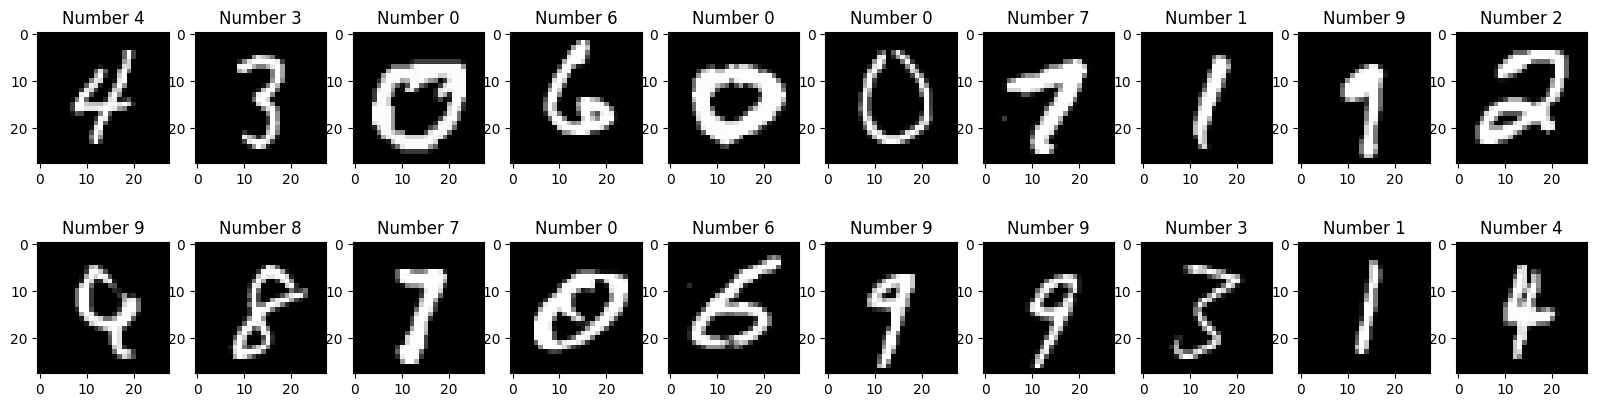

In [12]:
# hiển thị random 20 ảnh trong tập train
random_indices = np.random.randint(0, len(X_train), size=20)

fig, axis = plt.subplots(2, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = X_train.iloc[i].values.reshape(28, 28)
    ax.imshow(X_train.iloc[i].values.reshape(28, 28),
              interpolation='none', cmap='gray')

    number = y_train[i]
    ax.set(title=f"Number {number}")

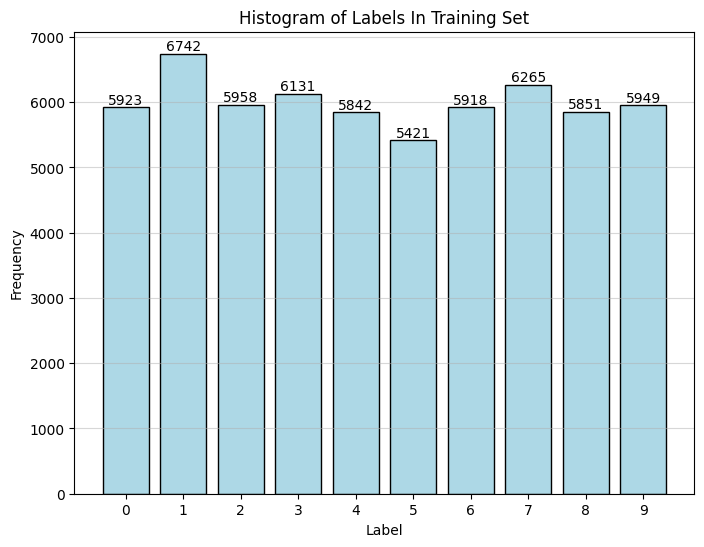

In [13]:
# Vẽ biểu đồ histogram thống kê số lượng ảnh mỗi nhãn trên tập train
plt.figure(figsize=(8, 6))
counts, _, _ = plt.hist(y_train, bins=range(
    11), align='left', rwidth=0.8, color='lightblue', edgecolor='black')
plt.title('Histogram of Labels In Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))

# Hiển thị số lượng trên đỉnh của từng cột
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(int(count)),
             fontsize=10, color='black', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.5)
plt.show()

In [14]:
y_test = mnist_test_df['label']
X_test = mnist_test_df.drop('label', axis=1)

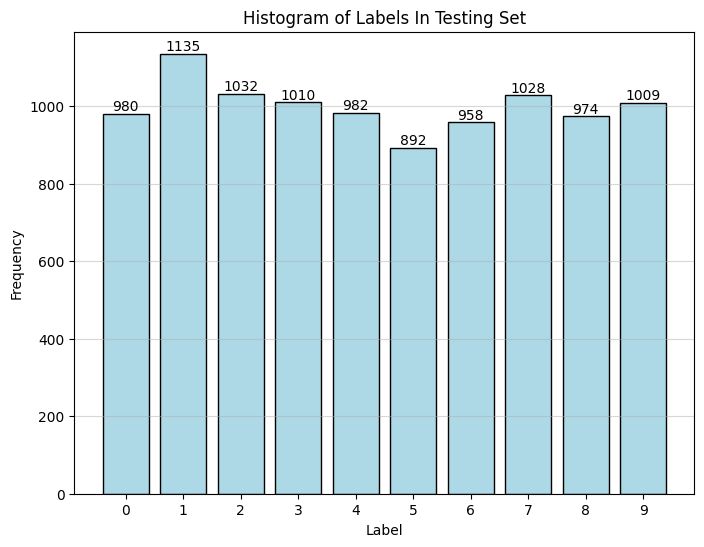

In [15]:
# Vẽ biểu đồ histogram thống kê số lượng nhãn ứng với mỗi nhãn trong tập test
plt.figure(figsize=(8, 6))
counts, _, _ = plt.hist(y_test, bins=range(
    11), align='left', rwidth=0.8, color='lightblue', edgecolor='black')
plt.title('Histogram of Labels In Testing Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))

# Hiển thị số lượng trên đỉnh của từng cột
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(int(count)),
             fontsize=10, color='black', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.5)
plt.show()

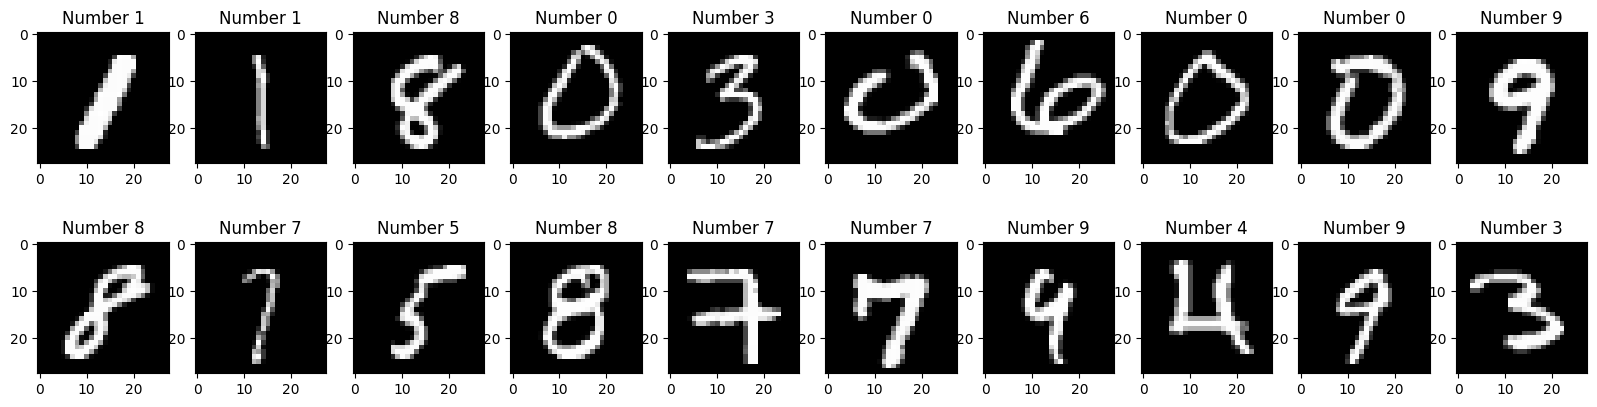

In [16]:
# hiển thị random 20 ảnh trong tập test
random_indices = np.random.randint(0, len(X_test), size=20)

fig, axis = plt.subplots(2, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = X_test.iloc[i].values.reshape(28, 28)
    ax.imshow(X_test.iloc[i].values.reshape(28, 28),
              interpolation='none', cmap='gray')
   
    number = y_test[i]
    ax.set(title=f"Number {number}")

In [17]:
# Kết hợp tập train, test -> tập dữ liệu
y = np.concatenate((y_train, y_test))
y.shape

(70000,)

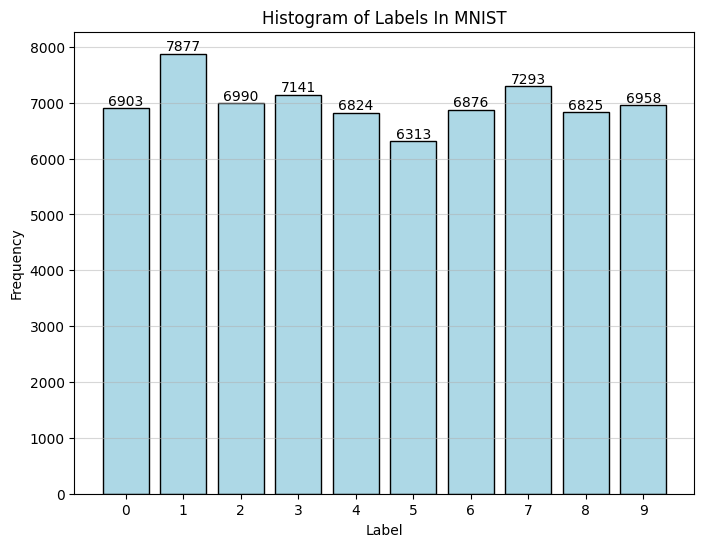

In [18]:
# Vẽ biểu đồ histogram thống kê số lượng ảnh trong mỗi class trên toàn bộ bộ dữ liệu MNIST
plt.figure(figsize=(8, 6))
counts, _, _ = plt.hist(y, bins=range(
    11), align='left', rwidth=0.8, color='lightblue', edgecolor='black')
plt.title('Histogram of Labels In MNIST')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))

# Hiển thị số lượng trên đỉnh của từng cột
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(int(count)),
             fontsize=10, color='black', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.5)
plt.show()

In [19]:
# Gộp X_train và X_test thành X
X = np.concatenate((X_train, X_test))
X.shape

(70000, 784)

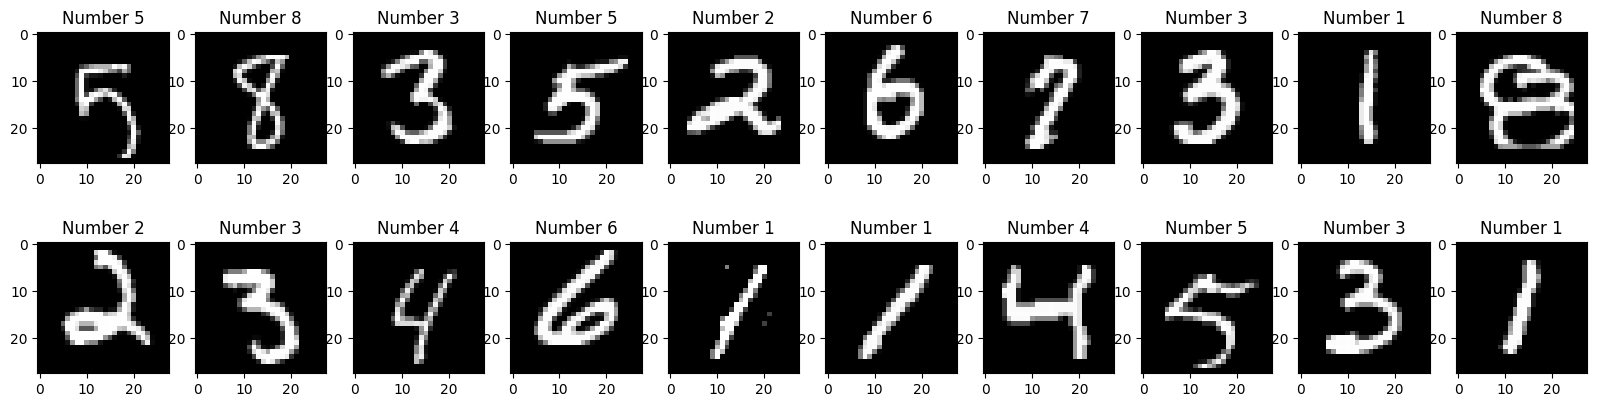

In [20]:
# hiển thị random 20 ảnh trong tập MNIST
random_indices = np.random.randint(0, len(X), size=20)

fig, axis = plt.subplots(2, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = X[i].reshape(28, 28)
    ax.imshow(grid_data,
              interpolation='none', cmap='gray')
    
    number = y[i]
    ax.set(title=f"Number {number}")

In [21]:
print(np.mean(X, axis=1))

[27.510204 49.13138  34.47194  ... 50.589287 40.08546  20.686224]


In [22]:
from my_pca import MyPCA
my_pca_2d = MyPCA(n_components=2)
my_pca_2d.fit(X)

values_2d, vectors_2d = my_pca_2d.eigenvalues_, my_pca_2d.eigenvectors_

print(f'First 10 eigenvalues: {values_2d[:10]}')
print(f'\n\nLast 10 eigenvalues: {values_2d[-10:]}')

First 10 eigenvalues: [40.57176924 29.05740844 26.87841028 20.8005567  18.12416148 15.76448395
 13.76413873 12.5153554  11.0168481  10.03790598]


Last 10 eigenvalues: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
print('Components:\n', my_pca_2d.components_)
print('Explained variance ratio:\n', my_pca_2d.explained_variance_ratio_)

Components:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ... -0. -0. -0.]]
Explained variance ratio:
 [0.05642439 0.04041102]


In [24]:
my_pca_2d.components_.shape

(2, 784)

In [25]:
cum_explained_variance = my_pca_2d.cum_explained_variance_
print('Cumulative explained variance:\n', cum_explained_variance)

Cumulative explained variance:
 [0.05642439 0.09683541]


In [26]:
d = X.shape[1]
d

784

In [27]:
percentage_var_explained = my_pca_2d.explained_variance_ratio_all / \
    np.sum(my_pca_2d.explained_variance_ratio_all)

cum_var_explained = np.cumsum(percentage_var_explained)

In [28]:
cum_var_explained

array([0.05642439, 0.09683541, 0.13421603, 0.163144  , 0.18834982,
       0.21027397, 0.22941617, 0.24682166, 0.26214312, 0.27610314,
       0.28952408, 0.30153806, 0.31267761, 0.32358294, 0.33386287,
       0.34381203, 0.35312404, 0.36232033, 0.37120632, 0.37983783,
       0.38805473, 0.39603852, 0.40366405, 0.41108701, 0.41825258,
       0.4251459 , 0.43196004, 0.43850606, 0.44477902, 0.45088242,
       0.45685521, 0.46274822, 0.46842177, 0.47401556, 0.47954027,
       0.48488483, 0.49016085, 0.49531935, 0.50037451, 0.50514896,
       0.50991228, 0.51456369, 0.51909855, 0.52355623, 0.52797959,
       0.53235855, 0.53673173, 0.54100925, 0.54525739, 0.54944275,
       0.5534835 , 0.55744621, 0.56137801, 0.56528371, 0.56914824,
       0.57292355, 0.57666261, 0.58034596, 0.58394999, 0.587514  ,
       0.59100715, 0.5944525 , 0.59788507, 0.60129519, 0.60464003,
       0.60796143, 0.61125959, 0.61445393, 0.61762515, 0.62077958,
       0.62387917, 0.62693723, 0.62998831, 0.63302821, 0.63599

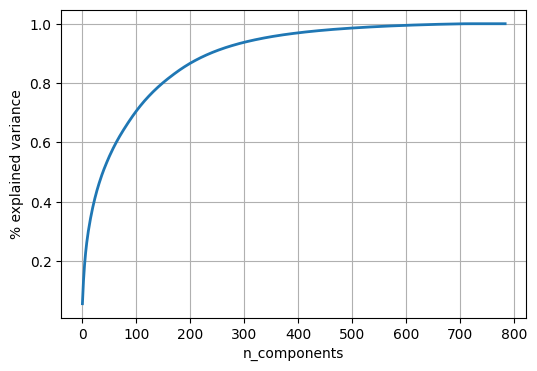

In [29]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('% explained variance')
plt.show()

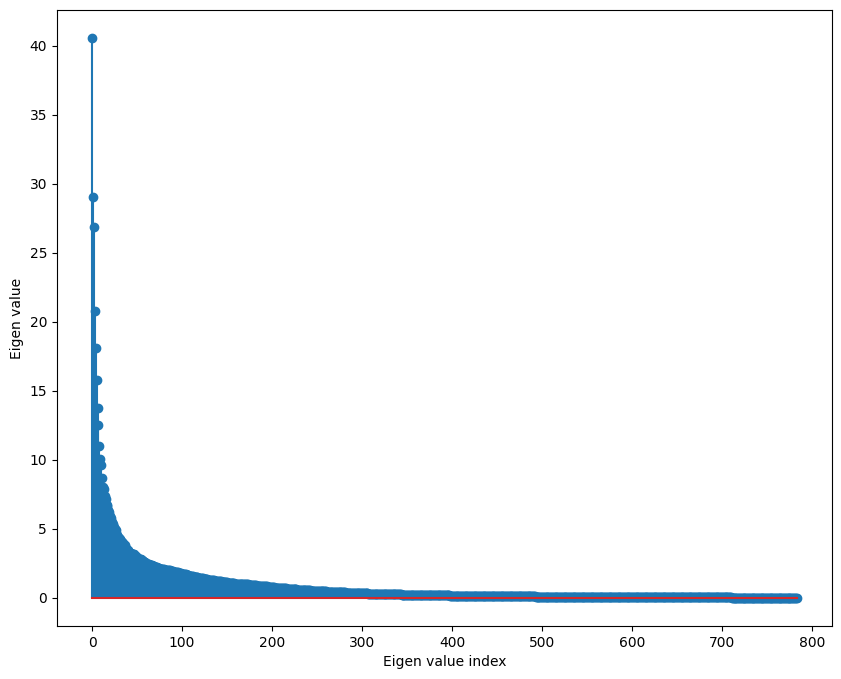

In [30]:
plt.figure(figsize=(10, 8))
plt.stem(values_2d[:d+1])
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [31]:
X_pca_2d = my_pca_2d.transform(X)  # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca_2d.shape)

Transformed data shape: (70000, 2)


In [32]:
X_pca_2d[:, 0], X_pca_2d[:, 1]

(array([-8.43447664, 12.28307104,  2.49850527, ...,  4.43233087,
        14.18157685, -6.96866787]),
 array([ 2.35009562, -2.44670383, -4.12765302, ...,  2.37543014,
         7.23741602,  1.98748832]))

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std)  # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

Components:
 [[ 3.8138381e-11 -1.4812040e-09 -3.4042266e-11 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 5.5808798e-09  1.2668654e-08  1.9759291e-10 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]]
Explained variance ratio:
 [0.05642723 0.04041228]
Cumulative explained variance:
 [0.05642723 0.09683951]
Transformed data shape: (70000, 2)


In [34]:
X_pca[:, 0], X_pca[:, 1]

(array([-8.434384 , 12.283016 ,  2.4991055, ...,  4.43188  , 14.181373 ,
        -6.9686546], dtype=float32),
 array([ 2.3479128, -2.4463964, -4.130521 , ...,  2.3785992,  7.2388306,
         1.9856739], dtype=float32))

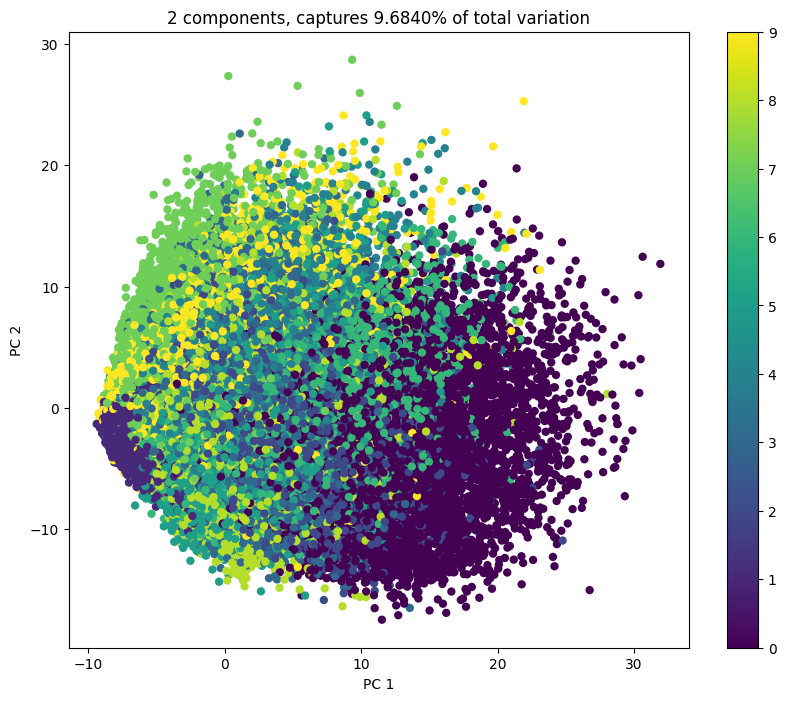

In [35]:
plt.figure(figsize=(10, 8))


plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, edgecolor="none")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('2 components, captures {:.4f}% of total variation'.format(
    cum_explained_variance[1]*100))
plt.colorbar()
plt.show()

In [36]:
pca_3d = MyPCA(3)
pca_3d.fit(X)

values_3d, vectors_3d = pca_3d.eigenvalues_, pca_3d.eigenvectors_

print(f'First 10 eigenvalues: {values_3d[:10]}')
print(f'\n\nLast 10 eigenvalues: {values_3d[-10:]}')

X_pca_3d = pca_3d.transform(X)  # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca_3d.shape)

First 10 eigenvalues: [40.57176924 29.05740844 26.87841028 20.8005567  18.12416148 15.76448395
 13.76413873 12.5153554  11.0168481  10.03790598]


Last 10 eigenvalues: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Transformed data shape: (70000, 3)


In [37]:
X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:,2]

(array([-8.43447664, 12.28307104,  2.49850527, ...,  4.43233087,
        14.18157685, -6.96866787]),
 array([ 2.35009562, -2.44670383, -4.12765302, ...,  2.37543014,
         7.23741602,  1.98748832]),
 array([-4.65705697, -2.38646651, -8.98753334, ...,  7.53750913,
         4.02282167, -3.93237668]))

In [38]:
cum_explained_variance_3d = pca_3d.cum_explained_variance_
cum_explained_variance_3d

array([0.05642439, 0.09683541, 0.13421603])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2184\1349987087.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  alpha=1, cmap=plt.cm.get_cmap("viridis", 10))


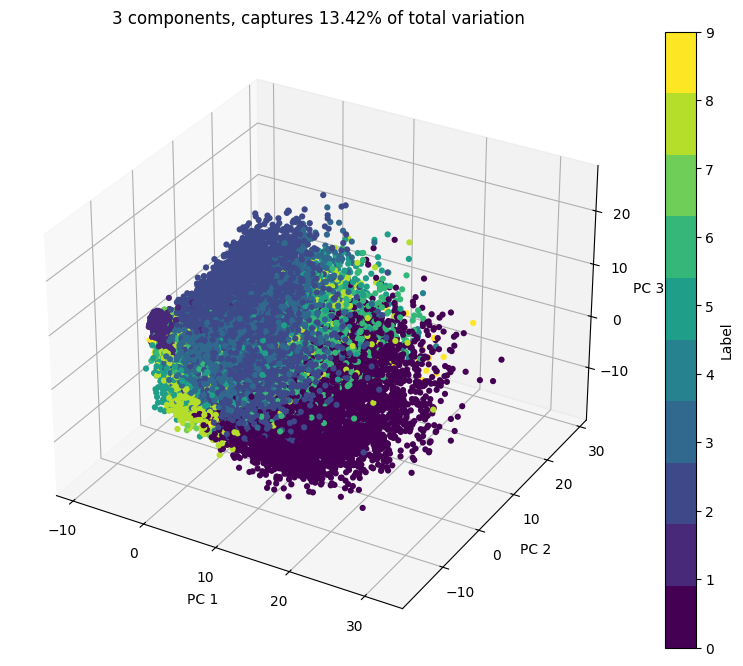

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Tạo một figure mới với kích thước lớn hơn
fig = plt.figure(figsize=(10, 8))

# Tạo subplot 3D
ax = fig.add_subplot(111, projection='3d')


# Vẽ scatter plot trong không gian 3D
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, edgecolor="none",
                     alpha=1, cmap=plt.cm.get_cmap("viridis", 10))


# Đặt nhãn cho các trục
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Đặt tiêu đề cho biểu đồ
ax.set_title('3 components, captures {:.2f}% of total variation'.format(
    cum_explained_variance_3d[2].round(4)*100))

# Thêm colorbar
plt.colorbar(scatter, ax=ax, label='Label')

# Hiển thị biểu đồ
plt.show()

In [40]:
# Tính giá trị trung bình của mỗi cột
mean_X= np.mean(X, axis=0)

# Tính độ lệch chuẩn của từng cột thuộc tính
std_X = np.std(X, axis=0)
std_X[std_X == 0] = 1e-16 # thay std tại những cột có std = 0 để tránh xảy ra lỗi khi thực hiện chuẩn hóa

# khôi phục cấu trúc dữ liệu dạng chuẩn X từ dữ liệu đã được đưa về không gian 2 chiều
X_reconstructed_2d = np.dot(X_pca_2d, vectors_2d[:2])

# Từ cấu trúc dữ liệu dạng chuẩn -> đưa về cấu trúc dạng ban đầu
data_reconstructed_2d = (X_reconstructed_2d * std_X) + mean_X

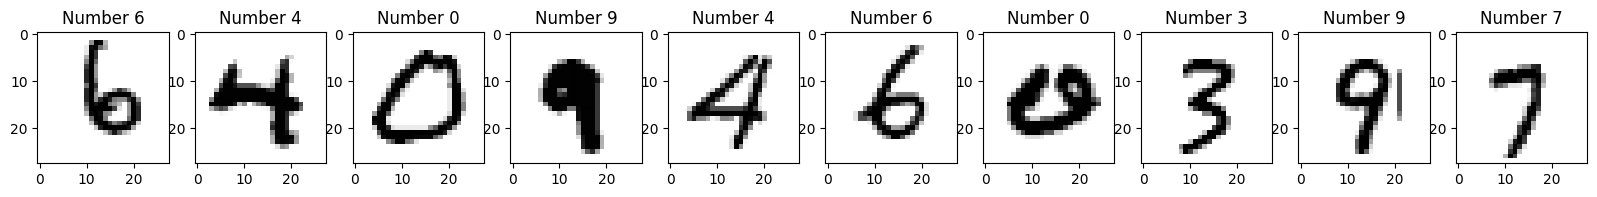

In [41]:
# hiển thị random 10 ảnh trong tập dữ liệu
random_indices = np.random.randint(0, len(X), size=10)

fig, axis = plt.subplots(1, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = X[i].reshape(28, 28)
    ax.imshow(grid_data,
              interpolation='none', cmap='binary')
    
    number = y[i]
    ax.set(title=f"Number {number}")

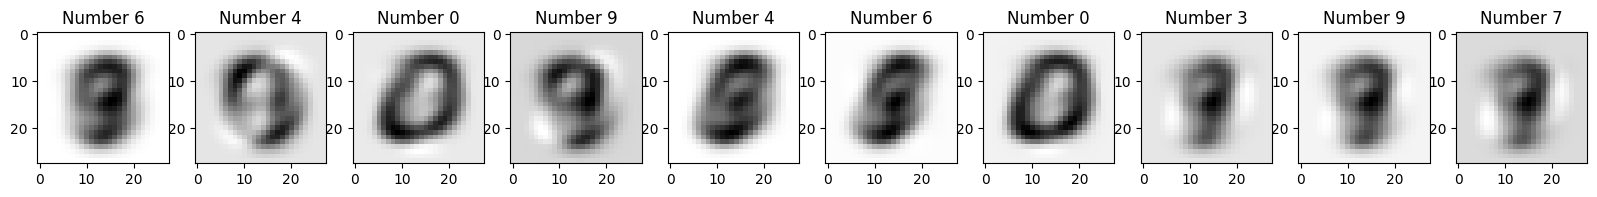

In [42]:
# hiển thị 10 được khôi phục từ không gian 2D
fig, axis = plt.subplots(1, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = data_reconstructed_2d[i].reshape(28, 28)
    ax.imshow(grid_data,
              interpolation='none', cmap='binary')
    
    number = y[i]
    ax.set(title=f"Number {number}")

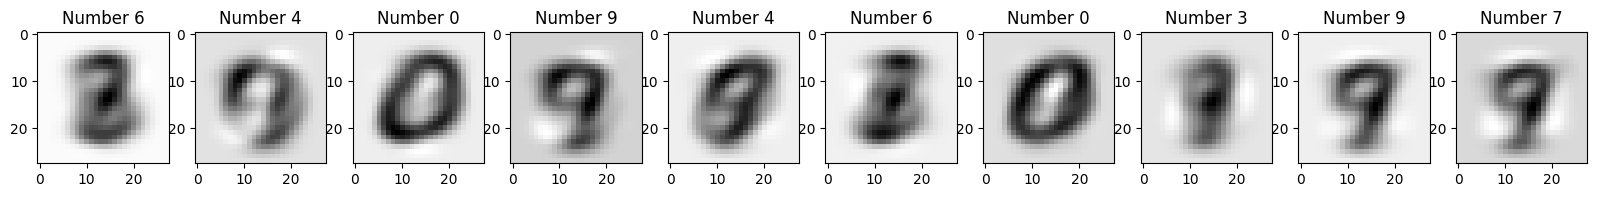

In [43]:
X_reconstructed_3d = np.dot(X_pca_3d, vectors_3d[:3])
data_reconstructed_3d = (X_reconstructed_3d * std_X) + mean_X

# hiển thị 10 ảnh được khôi phục từ 3D
fig, axis = plt.subplots(1, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = data_reconstructed_3d[i].reshape(28, 28)
    ax.imshow(grid_data,
              interpolation='none', cmap='binary')

    number = y[i]
    ax.set(title=f"Number {number}")

In [44]:
pca_100d = MyPCA(100)
X_pca_100d = pca_100d.fit_transform(X)
print(f"Raito Varicane: {pca_100d.cum_explained_variance_[99] * 100:.4f} %")

Raito Varicane: 70.3758 %


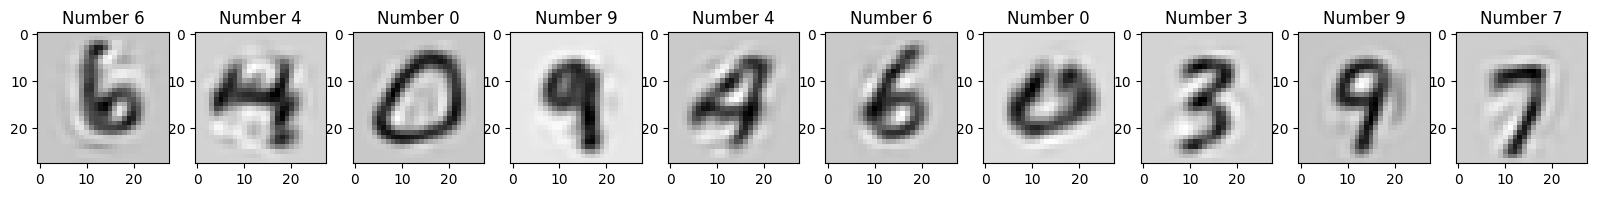

In [45]:
X_reconstructed_100d = np.dot(X_pca_100d, pca_100d.eigenvectors_[:100])
data_reconstructed_100d = (X_reconstructed_100d * std_X) + mean_X
reconstructed_images_100d = np.reshape(data_reconstructed_100d, (-1, 28, 28))

# hiển thị 10 ảnh được khôi phục từ không gian 100D
fig, axis = plt.subplots(1, 10, figsize=(20, 5))
for i, ax in zip(random_indices, axis.flat):
    grid_data = data_reconstructed_100d[i].reshape(28, 28)
    ax.imshow(grid_data,
              interpolation='none', cmap='binary')

    number = y[i]
    ax.set(title=f"Number {number}")